0.001381815074807774
1.9187486324713355e-06


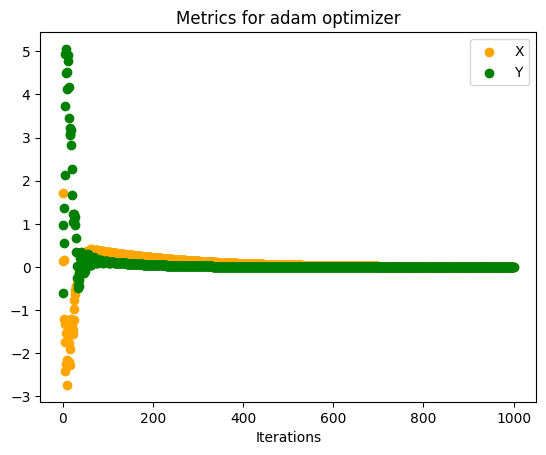

In [5]:


import sys
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Optimizer for Reosenbrock function
# Minimum value = 0 at (1, 1)
class GDOptimizer(object):
    def __init__(self, lr=0.01, iterations=70, x=0.14149347, y=0.96832859):
        # Base Initializations
        self.x, self.y = x, y
        self.a, self.b = 0., 100
        
        self.iterations = 1000
        self.lr = lr # Learning Rate
        
        # For Momentum Based methods
        self.momentum = 0.9
        self.momentum_acc_x = 0.
        self.momentum_acc_y = 0.
        
        # For Adaptive Learning Rate methods
        self.acc_x_grads = 0.
        self.acc_y_grads = 0.
        
        # For Adam(Adaptive Moment Estimation) - Values found empirically from papers
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.acc_x_first_moment = 0.
        self.acc_y_first_moment = 0.
        
        # Metrics
        self.all_x = [self.x]
        self.all_y = [self.y]
        self.costs = [self.computeCost(self.x, self.y, self.a, self.b)]
        
    def runGradientDescent(self, optimizer):
        for ite in range(self.iterations):
            der_C_x = -2*(self.a - self.x) - 4*self.b*self.x*(self.y - self.x**2)
            der_C_y = 2*self.b*(self.y - self.x**2)

            if(optimizer == 'vanilla'):
                self.x -= self.lr*der_C_x
                self.y -= self.lr*der_C_y
            elif(optimizer == 'momentum'):
                self.momentum_acc_x = self.momentum*self.momentum_acc_x + self.lr*der_C_x
                self.momentum_acc_y = self.momentum*self.momentum_acc_y + self.lr*der_C_y
                self.x -= self.momentum_acc_x
                self.y -= self.momentum_acc_y
            elif(optimizer == 'nesterov'):
                # https://www.reddit.com/r/MachineLearning/comments/3rbxyw/whats_the_difference_between_momentum_based/
                # http://sebastianruder.com/optimizing-gradient-descent/index.html#gradientdescentoptimizationalgorithms
                self.momentum_acc_x = (self.momentum**2)*self.momentum_acc_x + (1 + self.momentum)*(self.lr*der_C_x)
                self.momentum_acc_y = (self.momentum**2)*self.momentum_acc_y + (1 + self.momentum)*(self.lr*der_C_y)
                self.x -= self.momentum_acc_x
                self.y -= self.momentum_acc_y
            elif(optimizer == 'adagrad'):
                self.acc_x_grads += der_C_x**2
                self.acc_y_grads += der_C_y**2
                self.x -= (self.lr)/(np.sqrt(self.acc_x_grads) + 1e-8)*der_C_x
                self.y -= (self.lr)/(np.sqrt(self.acc_y_grads) + 1e-8)*der_C_y
            elif(optimizer == 'rmsprop'):
                self.acc_x_grads = self.momentum*self.acc_x_grads + (1-self.momentum)*(der_C_x**2)
                self.acc_y_grads = self.momentum*self.acc_y_grads + (1-self.momentum)*(der_C_y**2)
                self.x -= (self.lr)/(np.sqrt(self.acc_x_grads) + 1e-8)*der_C_x
                self.y -= (self.lr)/(np.sqrt(self.acc_y_grads) + 1e-8)*der_C_y
            elif(optimizer == 'adam'):
                self.acc_x_grads = (self.beta2*self.acc_x_grads + (1-self.beta2)*(der_C_x**2))
                self.acc_y_grads = (self.beta2*self.acc_y_grads + (1-self.beta2)*(der_C_y**2))
                self.acc_x_first_moment = (self.beta1*self.acc_x_first_moment + (1-self.beta1)*der_C_x)
                self.acc_y_first_moment = (self.beta1*self.acc_y_first_moment + (1-self.beta1)*der_C_y)
                self.x -= (self.lr)/(np.sqrt(self.acc_x_grads) + 1e-8)*self.acc_x_first_moment
                self.y -= (self.lr)/(np.sqrt(self.acc_y_grads) + 1e-8)*self.acc_y_first_moment
                

            # Collect all Intermediate X, Y and Costs
            self.all_x.append(self.x)
            self.all_y.append(self.y)
            self.costs.append(self.computeCost(self.x, self.y, self.a, self.b))

    # Cost Function = (a - x)**2 + b(y - x**2)**2
    def computeCost(self, x, y, a, b):
        return (a - x)**2 + b*((y - x**2)**2) 
    
    def plotDerivatives(self):
        plt.title("Change in Gradients vs Iterations")
        plt.scatter(range(self.iterations), self.all_der_x, color="orange", label="X")
        plt.scatter(range(self.iterations), self.all_der_y, color="green", label="Y")
        plt.legend()
        plt.show()
        
    def plotOptimizer(self, method):
        print(self.x)
        print(self.y)
        plt.title("Metrics for " + str(method) + " optimizer")
        plt.scatter(range(self.iterations+1), self.all_x, color = "orange", label="X")
        plt.scatter(range(self.iterations+1), self.all_y, color = "green", label = "Y")
        plt.legend()
        plt.xlabel("Iterations")
        plt.show()
        
    def plotCost(self, method):
        plt.scatter(range(self.iterations+1), self.costs, color = "blue", label="Cost")
        plt.ylim(0, 5)
        plt.xlabel("Iterations")
        plt.legend()
        plt.show()


# Adam
optimizer = GDOptimizer(0.5)
optimizer.runGradientDescent('adam')
optimizer.plotOptimizer('adam')

